# Lab 7 - Word embeddings

In [1]:
import random
import warnings

import matplotlib.pyplot as plt
import numpy as np

from gensim.models import KeyedVectors
from sklearn.manifold import TSNE

warnings.filterwarnings("ignore", category=DeprecationWarning)  # ignoring deprecation warnings from gensim

### Task 1
Loading models using: https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.load.  

Finding most similar words in all tasks using: https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar.  

Finding vector representation for word: https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.get_vector.

Fetching random word using `index2word` property: https://radimrehurek.com/gensim/models/fasttext.html#gensim.models.fasttext.FastTextKeyedVectors.index2word

### Task 2

In [2]:
model_100 = KeyedVectors.load('./word2vec/word2vec_100_3_polish.bin')
model_300 = KeyedVectors.load('./word2vec/word2vec_300_3_polish.bin')

print(model_300.most_similar(positive=['król', 'kobieta'], negative=['mężczyzna'], topn=1))

[('królowa', 0.777850866317749)]


### Task 3 & 4
Find the most similar words for the following expressions:
- kpk
- szkoda
- wypadek
- kolizja
- nieszczęście
- rozwód  

Display 5 most similar words according to each model.

In [3]:
expressions = ['kpk', 'szkoda', 'wypadek', 'kolizja', 'nieszczęście', 'rozwód']

for expression in expressions:
    print("{}:".format(expression))
    print("\tMODEL_100: ", ", ".join([res[0] for res in model_100.most_similar(positive=[expression], topn=5)]))
    print("\tMODEL_300: ", ", ".join([res[0] for res in model_300.most_similar(positive=[expression], topn=5)]))

kpk:


c:\users\micha\appdata\local\programs\python\python37\lib\site-packages\gensim\models\keyedvectors.py:2389: RuntimeWarning: invalid value encountered in true_divide
  return (m / dist).astype(REAL)


	MODEL_100:  kilopond, kpzs, kpu, sownarkomu, wcik
	MODEL_300:  ksh, cywilnego, postępowania, kilopond, kkkw
szkoda:
	MODEL_100:  krzywda, pożytek, strata, ryzyko, uszczerbek
	MODEL_300:  uszczerbek, krzywda, strata, despekt, pożytek
wypadek:
	MODEL_100:  przypadek, okoliczności, padku, incydent, zdarzenie
	MODEL_300:  przypadek, okoliczności, padku, padki, incydent
kolizja:
	MODEL_100:  zderzenie, awaria, kraksa, turbulencja, poślizg
	MODEL_300:  zderzenie, awaria, kraksa, turbulencja, poślizg
nieszczęście:
	MODEL_100:  niebezpieczeństwo, cierpienia, strapienie, cierpienie, utrapienie
	MODEL_300:  utrapienie, cierpienia, niedola, strapienie, cierpienie
rozwód:
	MODEL_100:  małżeństwo, separacja, adopcja, ślub, unieważnienie
	MODEL_300:  separacja, małżeństwo, ślub, rozwodowy, unieważnienie


### Task 5 & 6
Find the most similar words for the following expressions (average the representations for each word):
- sąd najwyższy
- trybunał konstytucyjny
- szkoda majątkowy
- kodeks cywilny
- sąd rejonowy  

Display 7 most similar words according to each model.

In [4]:
expressions = ['sąd najwyższy', 'trybunał konstytucyjny', 'szkoda majątkowy', 'kodeks cywilny', 'sąd rejonowy']

for expression in expressions:
    words = expression.split(" ")
    expr_vec_100 = np.add(*[model_100.wv.get_vector(w) for w in words]) / len(words)
    expr_vec_300 = np.add(*[model_300.wv.get_vector(w) for w in words]) / len(words)
    print("{}:".format(expression))
    print("\tMODEL_100: ", ", ".join([res[0] for res in model_100.most_similar(positive=[expr_vec_100], topn=7)]))
    print("\tMODEL_300: ", ", ".join([res[0] for res in model_300.most_similar(positive=[expr_vec_300], topn=7)]))

sąd najwyższy:
	MODEL_100:  sąd, trybunał, najwyższy, trybunat, sędzia, areopag, sprawiedliwość
	MODEL_300:  sąd, trybunał, najwyższy, sędzia, sądowy, trybunat, sprawiedliwość
trybunał konstytucyjny:
	MODEL_100:  trybunał, konstytucyjny, sąd, bunał, senat, bunału, trybunat
	MODEL_300:  trybunał, konstytucyjny, sąd, trybunat, senat, parlament, bunału
szkoda majątkowy:
	MODEL_100:  szkoda, majątkowy, krzywda, świadczenie, odszkodowanie, dochód, wydatek
	MODEL_300:  szkoda, majątkowy, uszczerbek, korzyść, krzywda, majątek, strata
kodeks cywilny:
	MODEL_100:  kodeks, cywilny, pasztunwali, deksu, teodozjańskim, pozakodeksowy, sądowo
	MODEL_300:  kodeks, cywilny, amiatyński, cywilnego, deksu, isps, jōei
sąd rejonowy:
	MODEL_100:  sąd, prokuratura, rejonowy, trybunał, sądowy, magistrat, prokurator
	MODEL_300:  sąd, rejonowy, prokuratura, trybunał, sądowy, okręgowy, apelacyjny


### Task 7
Find the result of the following equations (5 top results, both models):
- sąd + konstytucja - kpk
- pasażer + kobieta - mężczyzna
- pilot + kobieta - mężczyzna
- lekarz + kobieta - mężczyzna
- nauczycielka + mężczyzna - kobieta
- przedszkolanka + mężczyzna - kobieta
- samochód + rzeka - droga

In [5]:
expressions = [(["sąd", "konstytucja"], ["kpk"]), (["pasażer", "kobieta"], ["mężczyzna"]), (["pilot", "kobieta"], ["mężczyzna"]), (["lekarz", "kobieta"], ["mężczyzna"]),
               (["nauczycielka", "mężczyzna"], ["kobieta"]), (["przedszkolanka", "mężczyzna"], ["kobieta"]), (["samochód", "rzeka"], ["droga"])]

for positive, negative in expressions:
    print("{} - {}:".format(" + ".join(positive), " - ".join(negative)))
    print("\tMODEL_100: ", ", ".join([res[0] for res in model_100.most_similar(positive=positive, negative=negative, topn=7)]))
    print("\tMODEL_300: ", ", ".join([res[0] for res in model_300.most_similar(positive=positive, negative=negative, topn=7)]))

sąd + konstytucja - kpk:
	MODEL_100:  trybunał, ustawa, elekcja, deklaracja, dekret, postanowienie, ustawodawstwo
	MODEL_300:  trybunał, senat, ustawa, dekret, władza, parlament, elekcja
pasażer + kobieta - mężczyzna:
	MODEL_100:  pasażerka, stewardessa, stewardesa, taksówka, podróżny, pasażerski, przesyłka
	MODEL_300:  pasażerka, stewardesa, stewardessa, podróżny, pasażerski, konduktorka, bagażowy
pilot + kobieta - mężczyzna:
	MODEL_100:  nawigator, oblatywacz, lotnik, pilotka, awionetka, pinasa, radiooperator
	MODEL_300:  pilotka, lotnik, stewardesa, nawigator, oblatywacz, myśliwiec, stewardessa
lekarz + kobieta - mężczyzna:
	MODEL_100:  lekarka, ginekolog, pediatra, psychiatra, położna, pielęgniarka, akuszerka
	MODEL_300:  lekarka, pielęgniarka, ginekolog, psychiatra, chirurg, pediatra, położna
nauczycielka + mężczyzna - kobieta:
	MODEL_100:  uczennica, studentka, nauczyciel, wychowawczyni, koleżanka, przedszkolanka, instruktorka
	MODEL_300:  nauczyciel, wychowawczyni, uczennica, ko

### Task 8
Using the t-SNE algorithm compute the projection of the random 1000 words with the following words highlighted (both models):
- szkoda
- strata
- uszczerbek
- krzywda
- niesprawiedliwość
- nieszczęście
- kobieta
- mężczyzna
- pasażer
- pasażerka
- student
- studentka
- lekarz
- lekarka

In [18]:
highlighted = ["szkoda", "strata", "uszczerbek", "krzywda", "niesprawiedliwość", "nieszczęście", "kobieta", "mężczyzna", "pasażer", "pasażerka", "student", 
               "studentka", "lekarz", "lekarka"]

random_words = [random.choice(model_100.wv.index2word) for _ in range(1000)]  # to keep the same words

def calc_tSNE(model, highlighted_words, random_words):
    colors = plt.cm.rainbow(np.linspace(0, 1, len(highlighted_words)))
    
    random_words_vec = [model.wv.get_vector(w) for w in random_words]
    highlighted_words_vec = [model.wv.get_vector(w) for w in highlighted_words]
    
    tsne_res = TSNE(n_components=2).fit_transform(random_words_vec + highlighted_words_vec)
    
    plt.figure(figsize=(15, 10))

    plt.scatter(tsne_res[:len(random_words_vec), 0], tsne_res[:len(random_words_vec), 1], label="random words", color="lightgrey")
    for i in range(len(highlighted_words_vec)):
        plt.scatter(tsne_res[len(random_words_vec) + i, 0], tsne_res[len(random_words_vec) + i, 0], label=highlighted_words[i], color=colors[i])
    plt.legend()
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    plt.show()

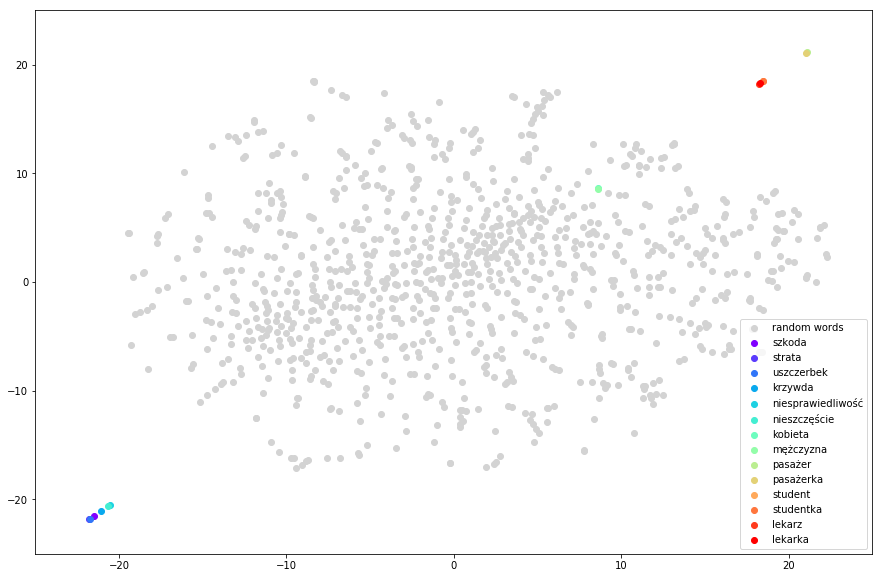

In [19]:
calc_tSNE(model_100, highlighted, random_words)

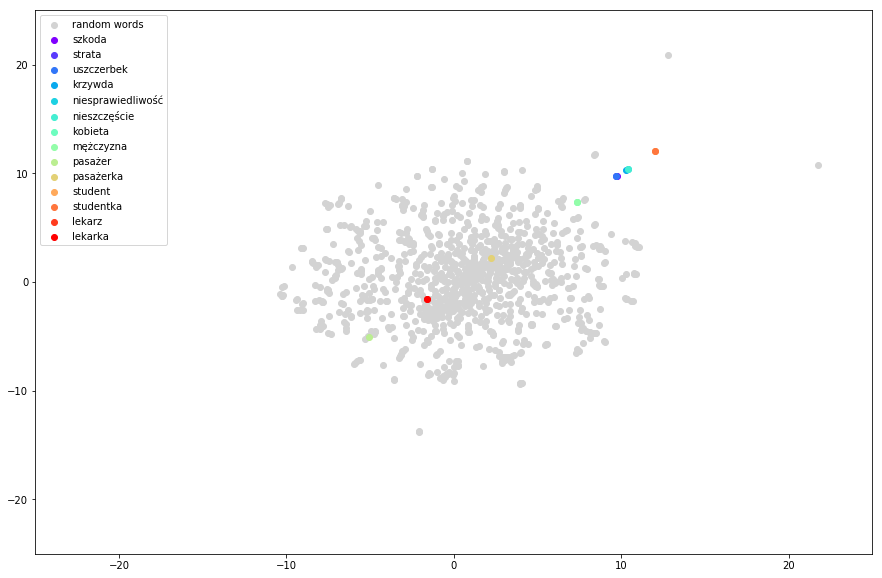

In [20]:
calc_tSNE(model_300, highlighted, random_words)

### Task 9
#### Compare results for all experiments with respect to the employed models (100 and 300-d)
The differences between them are really small, most of the time they returned same same words, just in the different order (and it is often difficult to tell objectively which word is "more similar" to another).  
300d model returned some very specific words in one case ('isps', 'jōei') but whether this is an advantage or disadvantage depends on the specific use case (e.g. this 'jōei' is some sort of a legal code so it IS related to the topic, but if I was looking for synonyms I don't see it helpful).  
Smaller model had minor troubles when changing some nouns' gender (returned third but not first) and a bigger one did not.  
#### Compare results for single words and MWEs.
In my opinion results for single words make more sense, because it seems like results for multiword expressions are connected more to either of words than the expression itself. Looks like we need a better mechanism to handle MWEs. 
#### How the results for MWEs could be improved?
Some different method of representing multiword expression as a single vector than a simple average.  
Also maybe finding the common most similar word and using it to find what we want (we could get a single word which is a synonym to the MWE, if it exists, but it won't work for proper names).
#### Are the results for albegraic operations biased?
Overall I'd say both models did fine.  
Changing the gender of a noun, counterparts of 'pasażer' and 'lekarz' were correctly found and returned as a first result. But smaller model returned correct words for female pilot and male teacher as the third in list, whereas bigger model considered them correctly as the most similar. (but he had a difficulty for different genders so it's even)  
Also both models got creative when it came to returning male version of a word PRZEDSZKOLANKA, as in polish we do not have a single word for it ('traktorzysta' is a highlight of the day here).  
Considering `samochód + rzeka - droga` both models seemed to care more about "off-road" part of the equation than "river" in particular (only 'ponton' and 'motorówka', and not at the beginning of the list).  
#### According to t-SNE: do representations of similar word cluster together?
Yes they do. We can differentiate 4-5 groups:
- "szkoda", "strata", "uszczerbek", "krzywda", "niesprawiedliwość", "nieszczęście"
- "kobieta", "mężczyzna" (on top of each other)
- "pasażer", "pasażerka"
- "student", "studentka"
- "lekarz", "lekarka" (separate only for 300d model)